# **CO2 Consumption Predictor**

**Problem Statement**

This project understands how different attributes of car such as model,engine size, vehicle class, fuel consumption, cylinders and transmission affects CO2 emission

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [5]:
# Load the CSV file into a DataFrame
df = pd.read_csv('data/FuelConsumptionCo2.csv')


In [30]:
# Display the first few rows of the DataFrame
print(df.head())


   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

In [31]:
# Summary statistics of numerical columns
print(df.describe())


       MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000 

In [32]:
# Check for missing values
print(df.isnull().sum())

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64


In [33]:
#since model year is same for all -2014
df.drop(columns="MODELYEAR",inplace=True)

In [34]:
# define numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']

We have 5 categorical features : ['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']


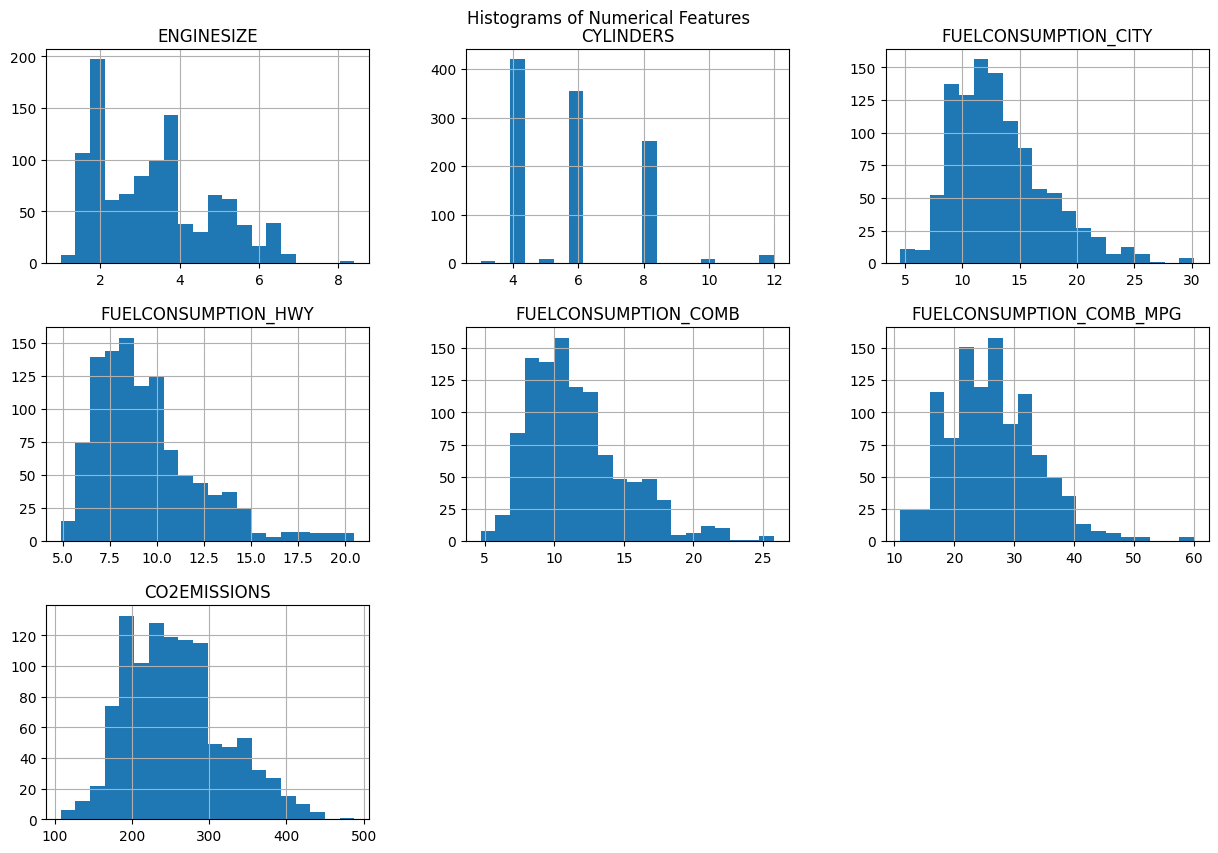

In [35]:

df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", y=0.92)
plt.show()

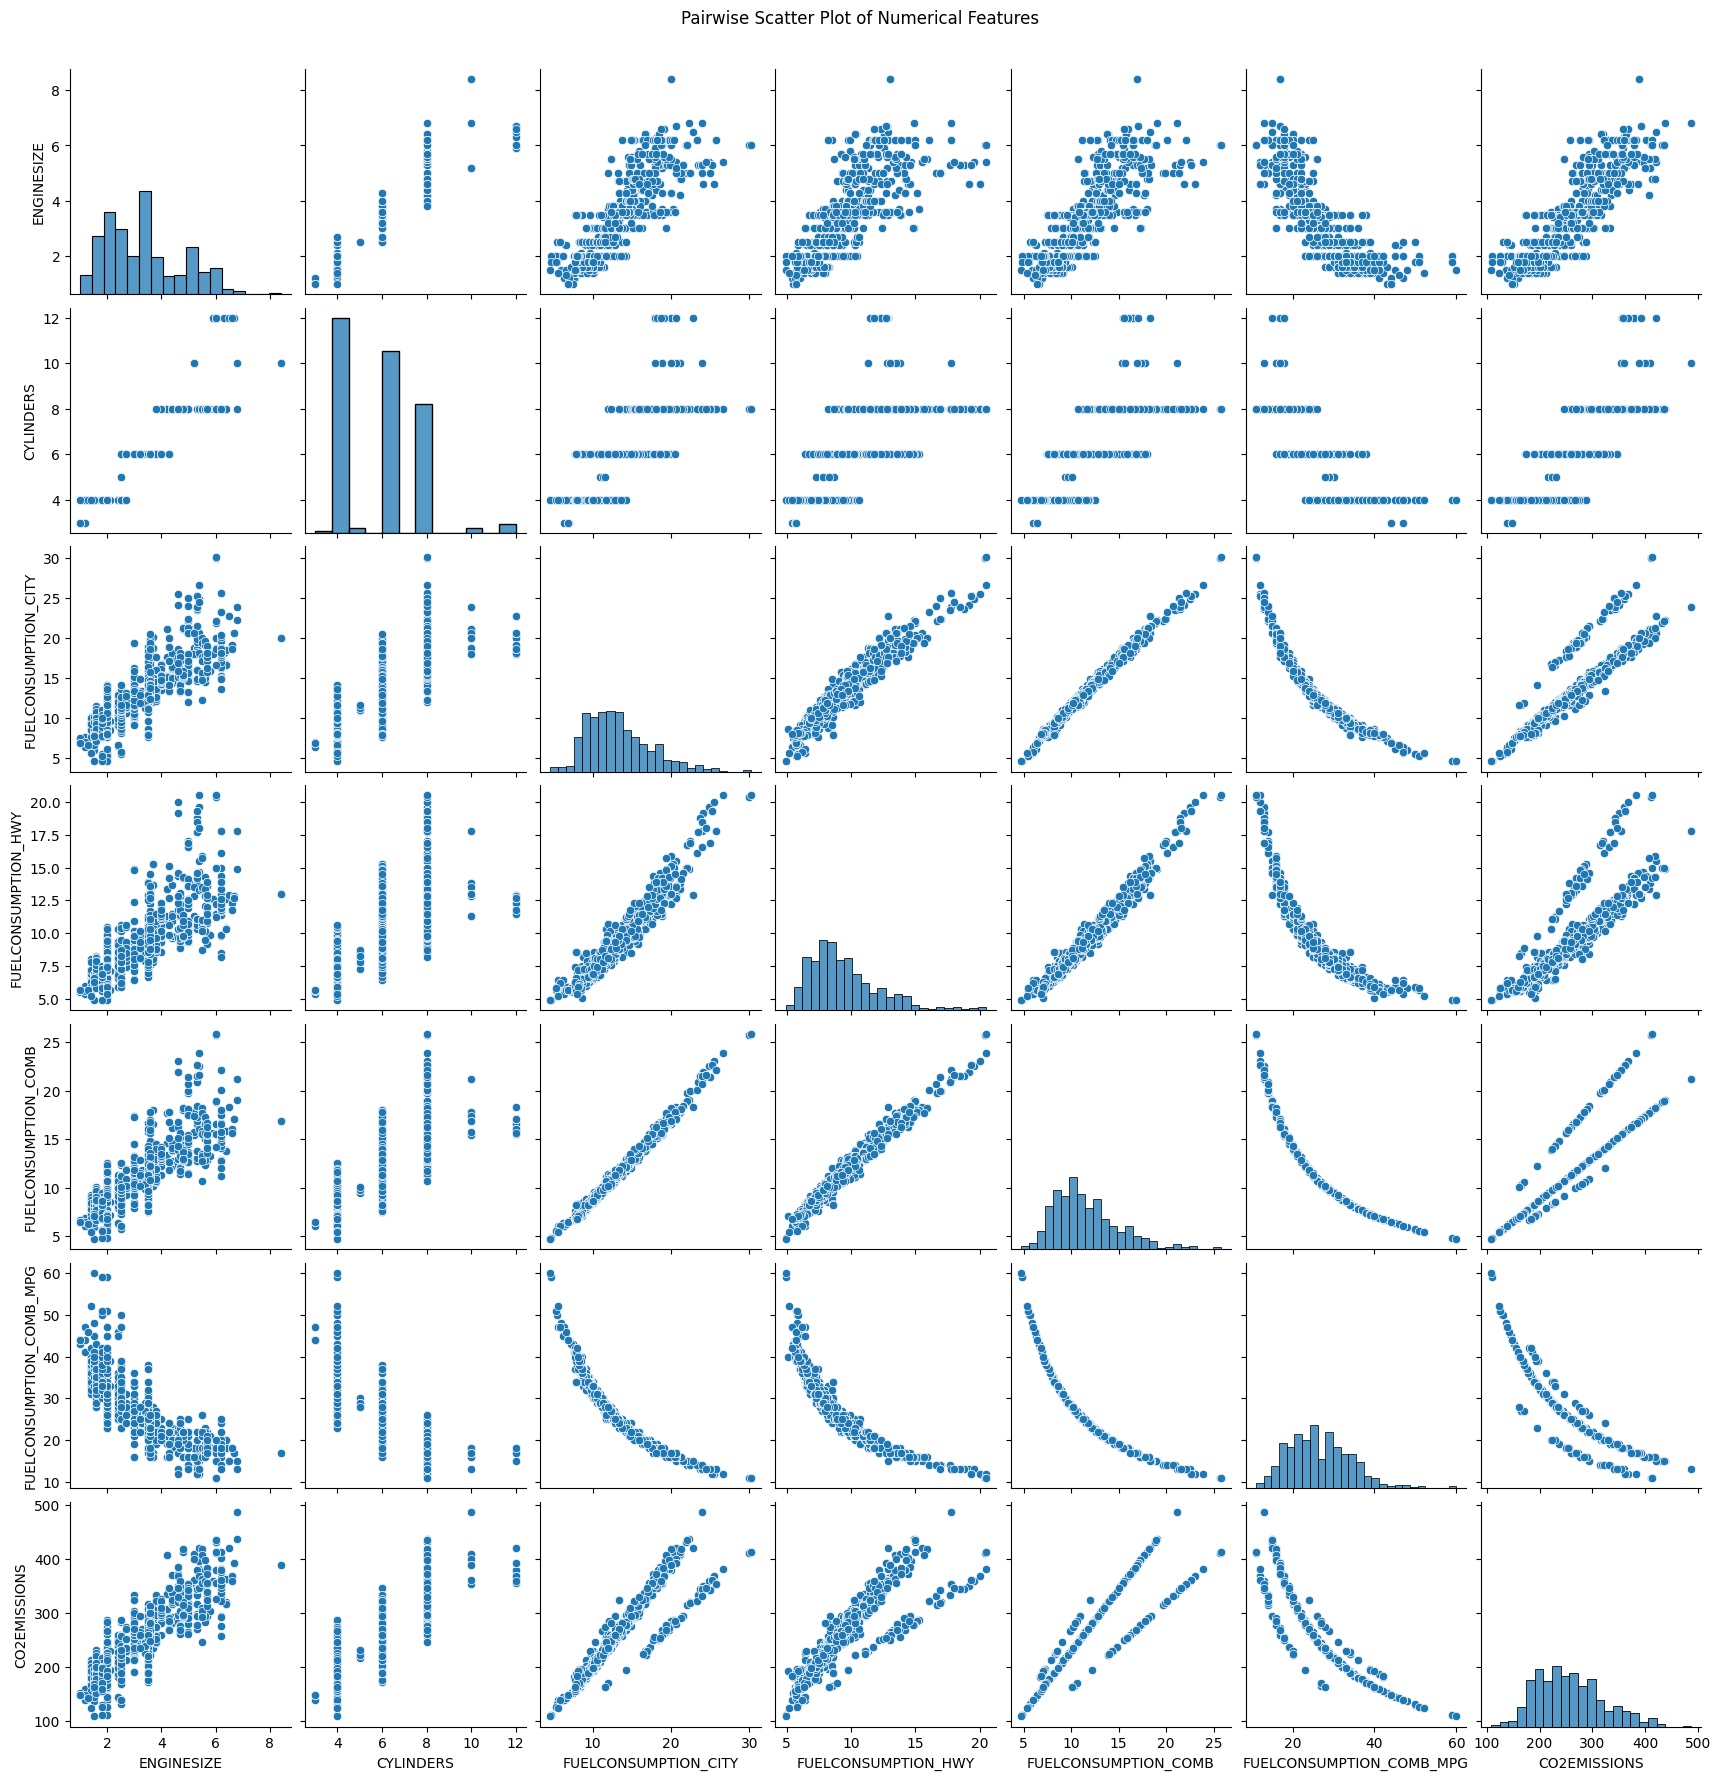

In [36]:
# Pairwise scatter plot for numerical features
sns.pairplot(df[numerical_features])
plt.suptitle("Pairwise Scatter Plot of Numerical Features", y=1.02)
plt.show()

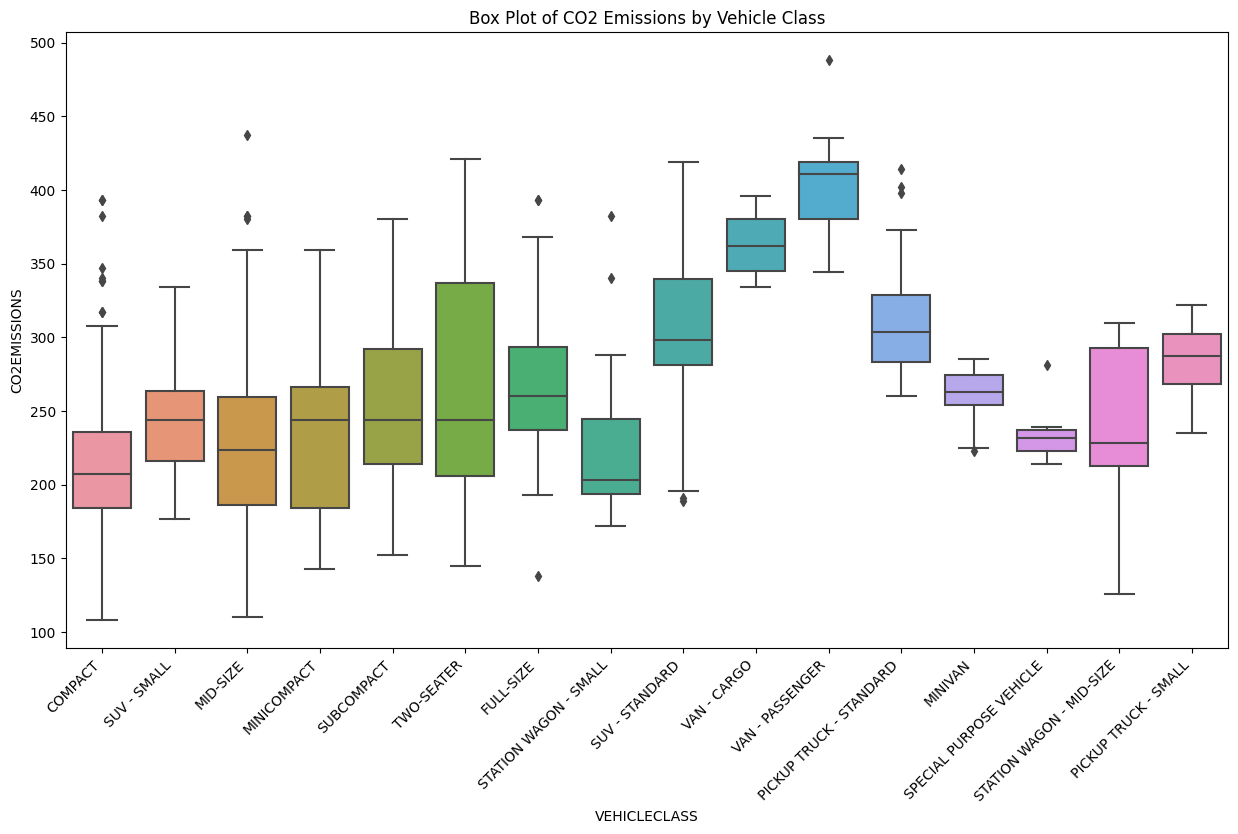

In [37]:

# Box plot for categorical feature 'VEHICLECLASS' against 'CO2EMISSIONS'
plt.figure(figsize=(15, 8))
sns.boxplot(x='VEHICLECLASS', y='CO2EMISSIONS', data=df)
plt.xticks(rotation=45, ha='right')
plt.title("Box Plot of CO2 Emissions by Vehicle Class")
plt.show()


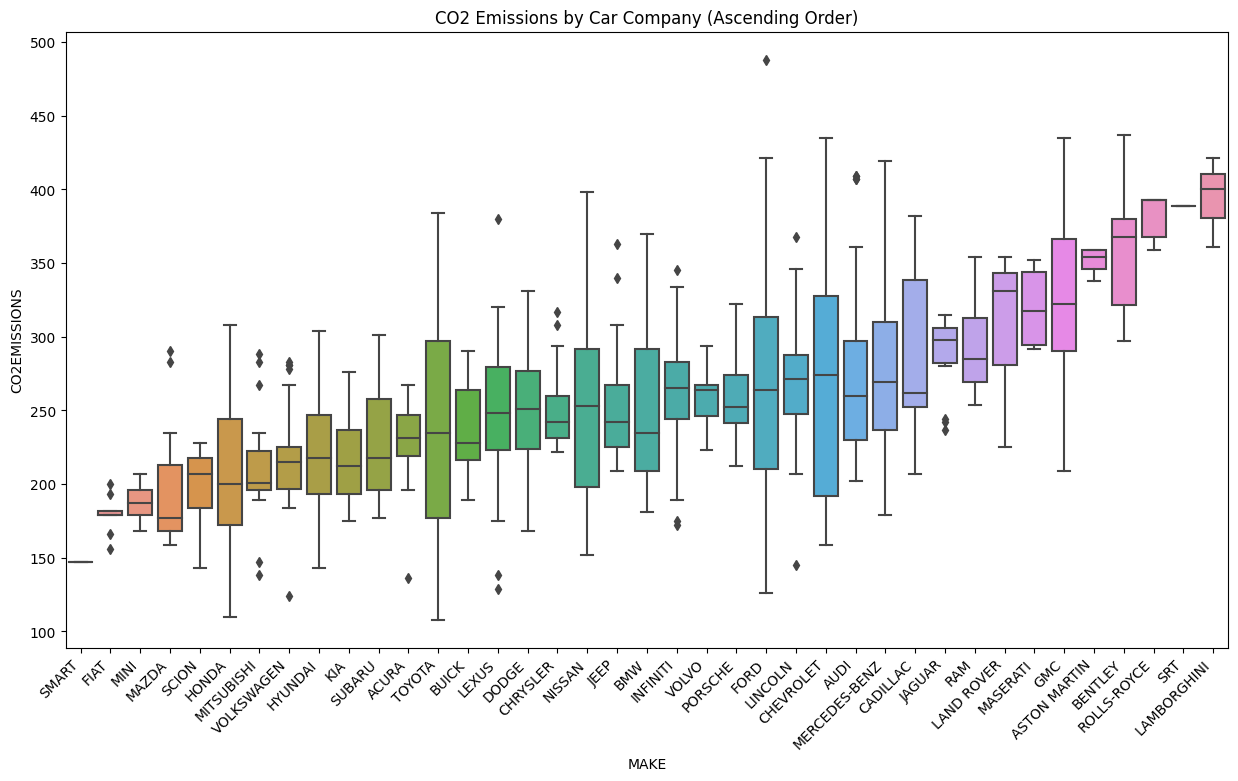

In [38]:
# Calculate mean CO2 emissions for each car company
mean_co2_by_make = df.groupby('MAKE')['CO2EMISSIONS'].mean().sort_values()

# Box plot for CO2 emissions by 'MAKE' in ascending order
plt.figure(figsize=(15, 8))
sns.boxplot(x=df['MAKE'], y=df['CO2EMISSIONS'], order=mean_co2_by_make.index)
plt.xticks(rotation=45, ha='right')
plt.title("CO2 Emissions by Car Company (Ascending Order)")
plt.show()

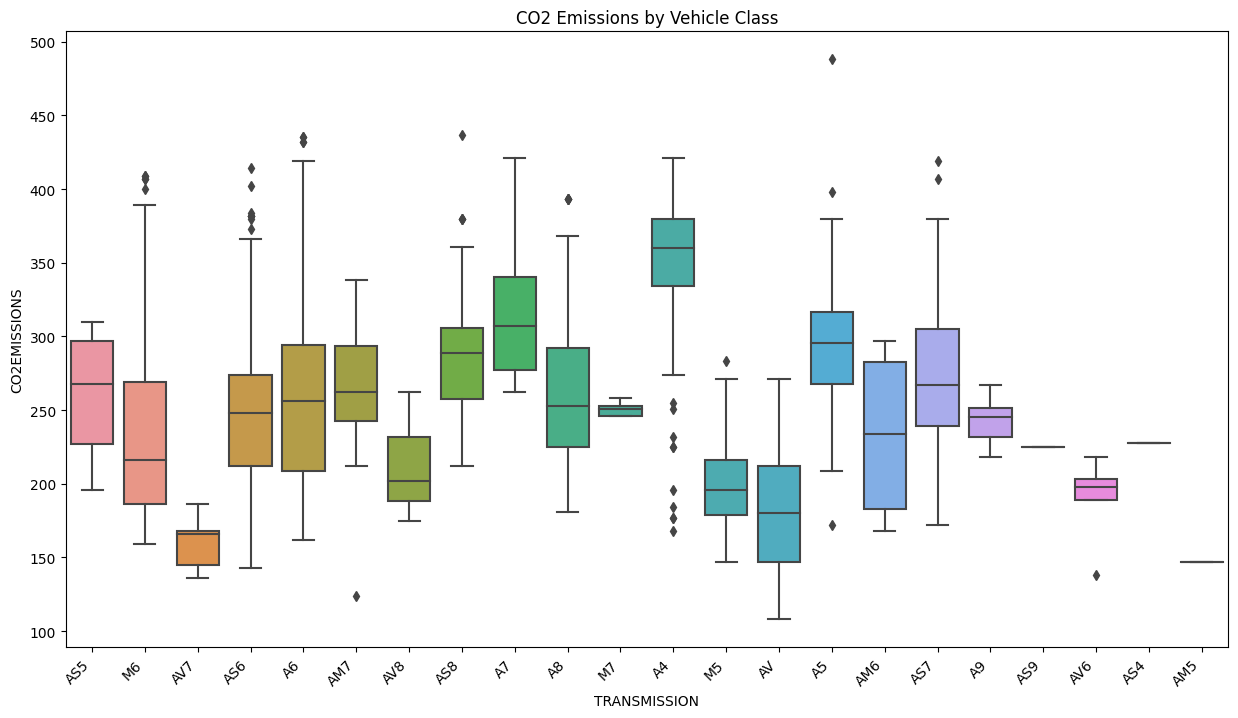

In [39]:
# Box plot for CO2 emissions by 'VEHICLECLASS'
plt.figure(figsize=(15, 8))
sns.boxplot(x='TRANSMISSION', y='CO2EMISSIONS', data=df)
plt.xticks(rotation=45, ha='right')
plt.title("CO2 Emissions by Vehicle Class")
plt.show()

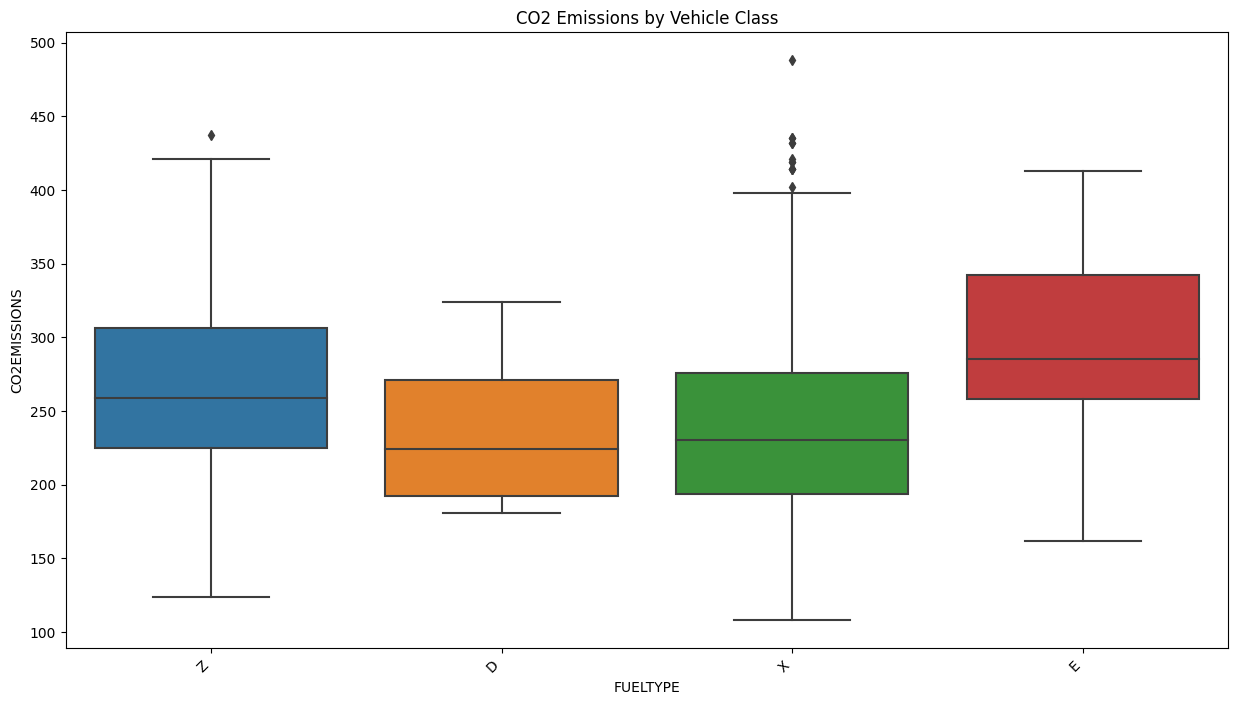

In [40]:
# Box plot for CO2 emissions by 'VEHICLECLASS'
plt.figure(figsize=(15, 8))
sns.boxplot(x='FUELTYPE', y='CO2EMISSIONS', data=df)
plt.xticks(rotation=45, ha='right')
plt.title("CO2 Emissions by Vehicle Class")
plt.show()

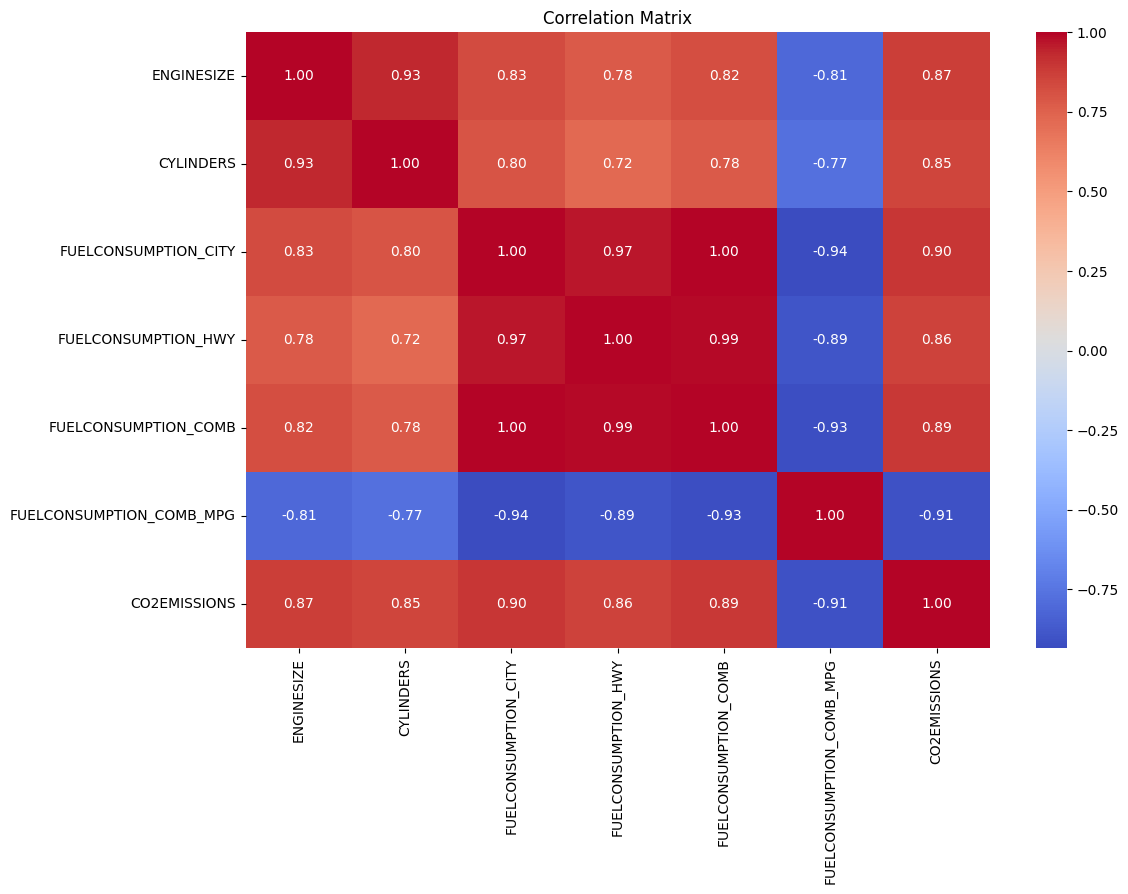

In [41]:
# Correlation matrix
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()